
#Red Neuronal

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)

2.10.0


Next, compare how the model performs on the test dataset:

Compare the RMSE measure you get to the [Kaggle leaderboard](https://www.kaggle.com/c/boston-housing/leaderboard). An RMSE of 2.651 puts us in 5th place.

The MNIST dataset containss 70,000 grayscale images of handwritten digits at a resolution of 28 by 28 pixels. The task is to take one of these images as input and predict the most likely digit contained in the image (along with a relative confidence in this prediction):

<img src="https://i.imgur.com/ITrm9x4.png" width="500px">

Now, we load the dataset. The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9.

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# reshape images to specify that it's a single channel
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [12]:
len(train_images)

60000

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the *training set* and the *testing set* are preprocessed in the same way:

In [3]:
def preprocess_images(imgs): # should work for both a single image and multiple images
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(28, 28, 1), (28, 28)], sample_img.shape # make sure images are 28x28 and single-channel (grayscale)
    return imgs / 255.0

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

Display the first 5 images from the *training set* and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

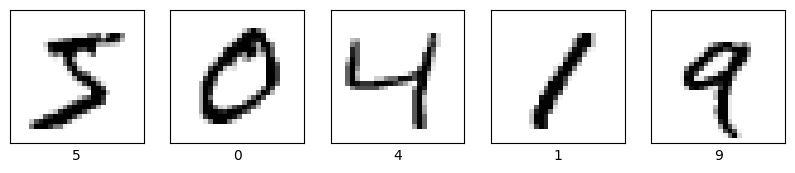

In [4]:
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

### Build the model

Building the neural network requires configuring the layers of the model, then compiling the model. In many cases, this can be reduced to simply stacking together layers:

In [23]:
model = keras.Sequential()
# 32 convolution filters used each of size 3x3
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* - measures how accurate the model is during training, we want to minimize this with the optimizer.
* *Optimizer* - how the model is updated based on the data it sees and its loss function.
* *Metrics* - used to monitor the training and testing steps. "accuracy" is the fraction of images that are correctly classified.

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_images` array. We verify that the predictions match the labels from the `test_labels` array. 

To start training,  call the `model.fit` method—the model is "fit" to the training data:

In [26]:
history = model.fit(train_images, train_labels,validation_split=0.2, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2891 - accuracy: 0.9171 - val_loss: 0.1567 - val_accuracy: 0.9533
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1291 - accuracy: 0.9626 - val_loss: 0.1282 - val_accuracy: 0.9621
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0866 - accuracy: 0.9742 - val_loss: 0.1048 - val_accuracy: 0.9692
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0632 - accuracy: 0.9813 - val_loss: 0.0958 - val_accuracy: 0.9720
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0500 - accuracy: 0.9849 - val_loss: 0.0885 - val_accuracy: 0.9734
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0381 - accuracy: 0.9880 - val_loss: 0.0889 - val_accuracy: 0.9756
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0314 - accuracy: 0.9903 - val_loss: 0.0810 - val_accuracy:

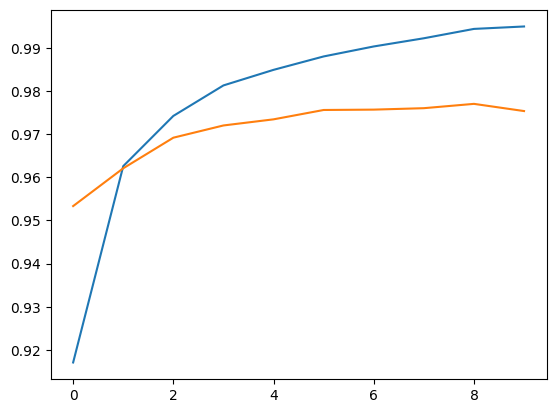

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

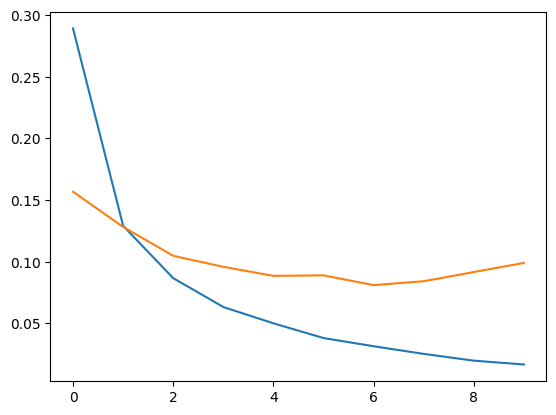

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 98.61% on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [29]:
print(test_images.shape)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

(10000, 28, 28, 1)
313/313 [==============================] - 1s 4ms/step - loss: 0.0843 - accuracy: 0.9772
Test accuracy: 0.9771999716758728


Often times, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of *overfitting*. 

### Make predictions

With the model trained, we can use it to make predictions about some images. Let's step outside the MNIST dataset for that and go with the beautiful high-resolution images generated by a mixture of CPPN, GAN, VAE. See [great blog post by hardmaru](http://blog.otoro.net/2016/04/01/generating-large-images-from-latent-vectors/) for the source data and a description of how these morphed animations are generated:

![MNIST dream](https://i.imgur.com/OrUJs9V.gif)

The above shows the prediction of the network by choosing the neuron with the highest output. While the output layer values add 1 to one, these do not reflect well-calibrated measures of "uncertainty". Often, the network is overly confident about the top choice that does not reflect a learned measure of probability. If everything ran correctly you should get an animation like this:

![MNIST dream predictions](https://i.imgur.com/eMF9FOG.gif)